<a href="https://colab.research.google.com/github/sarojsahu123/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [100]:
#importing required modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [101]:
#importing and mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
#Let's access the data set
path='/content/drive/MyDrive/Play Store App Review Analysis-Saroj Sahu/'
df=pd.read_csv(path + 'Play Store Data.csv')

In [103]:
df_copy=df.copy() #creating a copy to make our original data set safe and unmodified that may be used further

In [104]:
#Exploring the Data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Let's Understand the Data set**

Our Data set has the records of the App present in Play Store.Each row/entry gives details about a single individual App.

In [105]:
#Let's fetch the columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Exploring the columns**
1.   **'App'**-Name of the App
2.   **'Category'**-To which category the app belongs(Type of App)
1.   **'Rating'**-Rating of the App in Play Store
2.   **'Reviews'**-Number of users gives their reviews on the App(obviously after installing tha App)
1.   **'Size'**-size of the App(In MB/GB/KB...)
2.   **'Installs'**-How many installation of the App from Play Store
1.   **'Type'**-App is Free or Paid
2.   **'Price'**-Price of The App
1.   **'Content Rating'**-A type of Categorical Rating of the App to say to which age group it's recommended.
2.   **'Genres'**-Movie belongs to which Genre.(A subset of Category)
1.   **'Last Updated'**-Last update Date of the App
2.   **'Current Ver'**-Cerrent Version of the App
1.   **'Android Ver'**-Minimum android version required to support the App


















Some Information regarding the DataFrame 

In [106]:
df.shape

(10841, 13)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [108]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Let's start some **Data Cleaning**

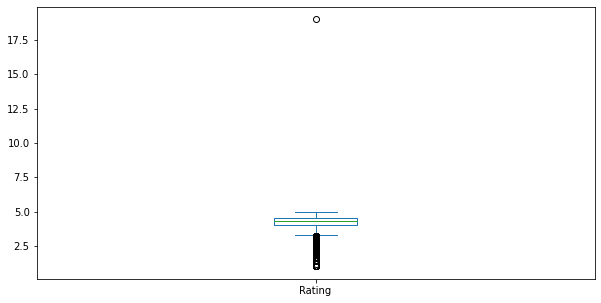

In [109]:
plt.rcParams['figure.figsize']=(10,5)
df.plot(kind='box');

There is one outlier which out of the rating range.So have to remove from the Dataset.

In [110]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [111]:
df.drop(df[df['Rating']>5].index,axis=0,inplace=True)

In [112]:
df[(df['Rating']>5) | (df['Rating']<0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Now No outlier in Data set

In [113]:
#ckecking for duplicate Entries
df[df.duplicated(keep='first')]    # Selecting duplicate rows except first

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [114]:
#Deleting the duplicate entries
df.drop_duplicates(subset=['App'],keep='first',inplace=True)  # Deleting duplicate rows except first

Now no duplicate entries in the Data set

In [115]:
df.shape

(9659, 13)

In [116]:
#Check for the NULL values in our Dataset
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

'Rating' column has highest number of NULL values,i.e.:1463

In [117]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [118]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Type ,Current Ver ,Android Ver columns have certain numbers of null values.Let's replace them with the values that are repeated for maximum times in that column.

In [119]:
print(df['Android Ver'].mode().values)
print(df['Current Ver'].mode().values)
print(df['Android Ver'].mode().values)

['4.1 and up']
['Varies with device']
['4.1 and up']


In [120]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [121]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now there is no NULL value in our Data set.

In [122]:
#we dropped some of the rows in our Data set,so reset the index of our DataFrame
df.reset_index(drop=True,inplace=True)

# Data Manupulation

In [123]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In the data set some column to be converted into numeric form for some logical and comparision operations.

In [124]:
df['Reviews']=df['Reviews'].astype('int')  #Reviews column was in other datatype format,Now it's is integer form.

In [125]:
def convert_Installs_to_numeric(installs): #Function that convert all values in 'Installs' column to Integer Format
  if '+' in installs:                      #As values in 'Installs' column are in string format
    installs=installs.replace('+','')
  if ',' in installs:
    installs=installs.replace(',','')
  return int(installs)  

In [126]:
df['Installs']=df['Installs'].apply(convert_Installs_to_numeric)

In [127]:
def convert_price_to_numeric(price):  #Values in 'Price' column are in string format so converting to numeric form   
  if '$' in price:
    price=price.replace('$','')
  if ',' in price:
    price=price.replace(',','')
  return float(price)

In [128]:
df['Price']=df['Price'].apply(convert_price_to_numeric)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 981.1+ KB


In [130]:
df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,7.777507e+06,1.099299
std,0.494312,1.831320e+06,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Now in the DataFrame,there is required Numeric columns that can be used for better and error less Data analysis.

# **DATA ANALYSIS AND VISUALIZATION**

Let's analyse the Data to find the key factors responsible for App success and try to get some insight results that can be benificiary for the organization and better selection of App to develop.

In [131]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [132]:
category_genre_App_volume=df.groupby(['Category','Genres'])['App'].count()
category_genre_App_volume

Category           Genres                               
ART_AND_DESIGN     Art & Design                              57
                   Art & Design;Action & Adventure            1
                   Art & Design;Creativity                    5
                   Art & Design;Pretend Play                  1
AUTO_AND_VEHICLES  Auto & Vehicles                           85
                                                           ... 
TRAVEL_AND_LOCAL   Travel & Local                           218
                   Travel & Local;Action & Adventure          1
VIDEO_PLAYERS      Video Players & Editors                  162
                   Video Players & Editors;Music & Video      1
WEATHER            Weather                                   79
Name: App, Length: 145, dtype: int64

# Finding category wise Apps volume present in Play Store

In [133]:
category_wise_App_volume=df['Category'].value_counts()
category_wise_App_volume

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

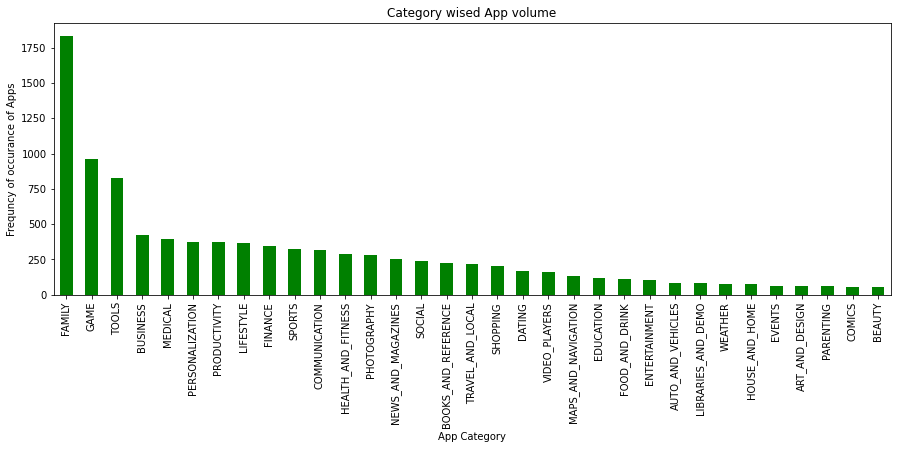

In [134]:
plt.rcParams['figure.figsize']=(15,5)
category_wise_App_volume.plot(kind='bar',color='green')
plt.title('Category wised App volume')
plt.xlabel('App Category')
plt.ylabel('Frequncy of occurance of Apps');

In PlayStore,Maximum Apps are of Family Categorical followed by Gaming Category.

# Let's find number of total installation of Apps in each category

In [135]:
app_category_install=df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
app_category_install

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

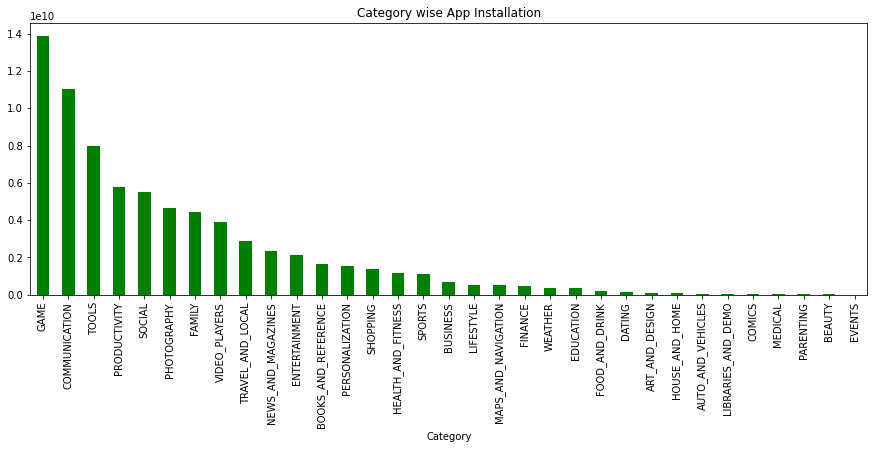

In [136]:
app_category_install.plot(kind='bar',color='g',linewidth=0.3)
plt.title('Category wise App Installation');

Gaming Apps are installed most followed by communication category.

In [137]:
#We can also find total App installation by each Category,as well as each Genre
df.groupby(['Category','Genres'])['Installs'].sum().sort_values(ascending=False)

Category       Genres                      
COMMUNICATION  Communication                   11038276251
TOOLS          Tools                            7991771915
PRODUCTIVITY   Productivity                     5793091369
SOCIAL         Social                           5487867902
PHOTOGRAPHY    Photography                      4649147655
                                                  ...     
FAMILY         Education;Brain Games                  1000
               Books & Reference;Creativity            100
               Board;Pretend Play                      100
               Role Playing;Education                  100
               Trivia;Education                        100
Name: Installs, Length: 145, dtype: int64

The Communication Genre(of Communication Category) has highest numbers of Installation.

# Let's find which category has highest average installation

In [138]:
app_category_avg_install=df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
app_category_avg_install

Category
COMMUNICATION          3.504215e+07
VIDEO_PLAYERS          2.409143e+07
SOCIAL                 2.296179e+07
ENTERTAINMENT          2.072216e+07
PHOTOGRAPHY            1.654501e+07
PRODUCTIVITY           1.548955e+07
GAME                   1.447229e+07
TRAVEL_AND_LOCAL       1.321866e+07
TOOLS                  9.675661e+06
NEWS_AND_MAGAZINES     9.327629e+06
BOOKS_AND_REFERENCE    7.504367e+06
SHOPPING               6.932420e+06
WEATHER                4.570893e+06
PERSONALIZATION        4.075784e+06
HEALTH_AND_FITNESS     3.972300e+06
MAPS_AND_NAVIGATION    3.841846e+06
SPORTS                 3.373768e+06
EDUCATION              2.965983e+06
FAMILY                 2.416999e+06
FOOD_AND_DRINK         1.891060e+06
ART_AND_DESIGN         1.786533e+06
BUSINESS               1.659916e+06
LIFESTYLE              1.365375e+06
FINANCE                1.319851e+06
HOUSE_AND_HOME         1.313682e+06
DATING                 8.241293e+05
COMICS                 8.032348e+05
LIBRARIES_AND_DEMO 

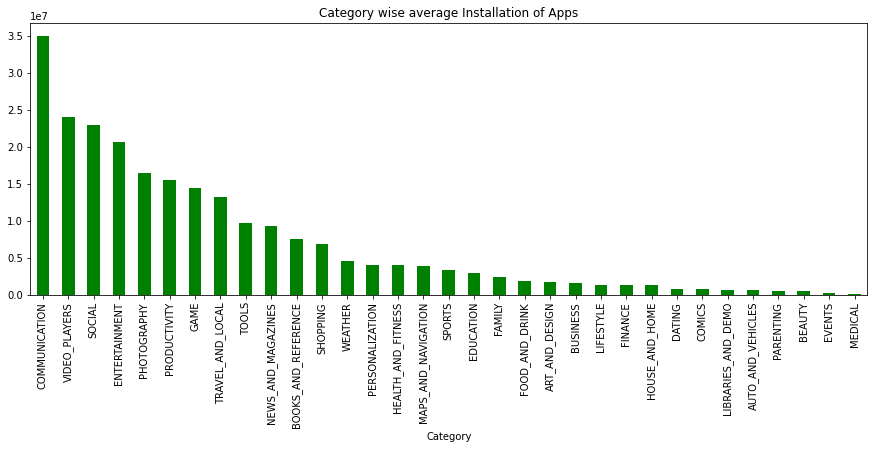

In [139]:
app_category_avg_install.plot(kind='bar',color='g',linewidth=0.3)
plt.title('Category wise average Installation of Apps');

Mostly Communication Apps are making users ready to install.



# Let's find which categories are ratted high

In [140]:
app_category_rating=df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
app_category_rating

Category
EDUCATION              4.362800
EVENTS                 4.357682
ART_AND_DESIGN         4.348746
BOOKS_AND_REFERENCE    4.303972
PERSONALIZATION        4.299237
PARENTING              4.278874
BEAUTY                 4.256711
GAME                   4.243736
WEATHER                4.236870
SOCIAL                 4.236137
HEALTH_AND_FITNESS     4.232370
SHOPPING               4.223819
SPORTS                 4.207572
AUTO_AND_VEHICLES      4.187987
PRODUCTIVITY           4.181408
COMICS                 4.181187
FAMILY                 4.178879
LIBRARIES_AND_DEMO     4.176963
FOOD_AND_DRINK         4.172485
MEDICAL                4.168330
PHOTOGRAPHY            4.158428
HOUSE_AND_HOME         4.153769
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.131741
COMMUNICATION          4.131179
BUSINESS               4.126427
FINANCE                4.122752
LIFESTYLE              4.108077
TRAVEL_AND_LOCAL       4.084675
TOOLS                  4.057175
VIDEO_PLAYERS          4.056433

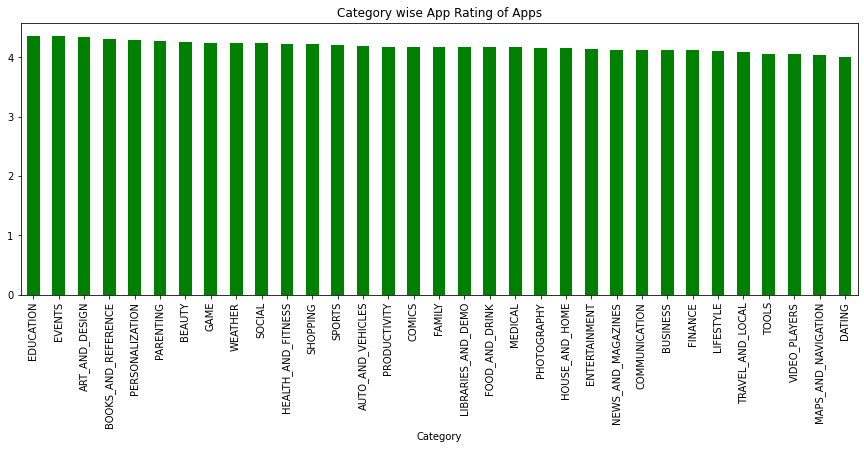

In [141]:
app_category_rating.plot(kind='bar',color='g',linewidth=0.3)
plt.title('Category wise App Rating of Apps');

All the Category has average App rating of more than 4.Educational Apps have the highest rating in Play Store.

# Let's go for some more observations

In [142]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [143]:
df['Type'].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

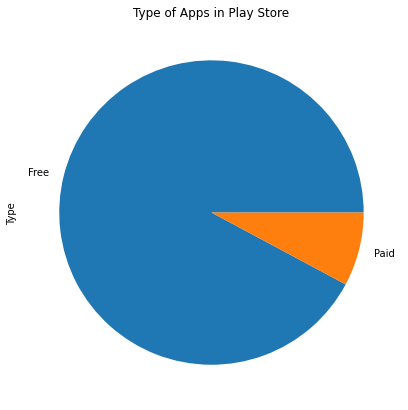

In [144]:
plt.rcParams['figure.figsize']=(12,7)
df['Type'].value_counts().plot(kind='pie')
plt.title('Type of Apps in Play Store');

Most of the Apps are Free in Play Store.Only very few(8%) are to be paid to use.

In [145]:
df.groupby('Type')['Installs'].mean()

Type
Free    8.431492e+06
Paid    7.587947e+04
Name: Installs, dtype: float64

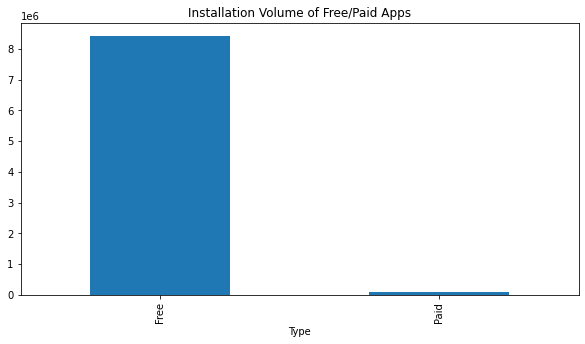

In [146]:
plt.rcParams['figure.figsize']=(10,5)
df.groupby('Type')['Installs'].mean().plot(kind='bar')
plt.title('Installation Volume of Free/Paid Apps');

Users mostly prefer the Free Apps to installs. 

In [147]:
TypeWise_rating=df.groupby('Type')['Rating'].mean().reset_index()
TypeWise_rating

,Type,Rating
0,Free,4.167384
1,Paid,4.242239


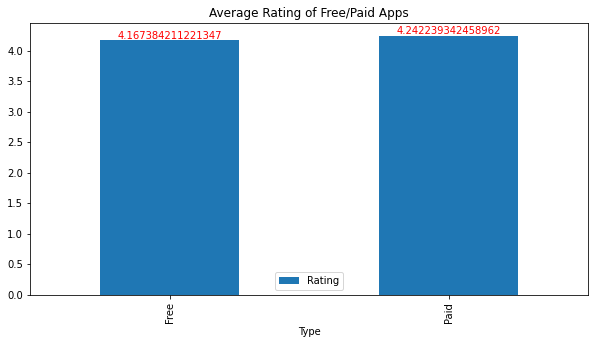

In [148]:
TypeWise_rating.plot(x='Type',y='Rating',kind='bar')
plt.title('Average Rating of Free/Paid Apps')
for i in TypeWise_rating.index:
  plt.annotate(TypeWise_rating['Rating'][i],xy=(i,TypeWise_rating['Rating'][i]),ha='center',va='bottom',color='r')
plt.show()

Paid Apps are having a little higher rating than Free Apps.

# Let's find most installed Apps in each Category.

In [149]:
x=df.groupby('Category')['Installs'].max().reset_index()

In [150]:
app=[]
for i,j in zip(x['Category'],x['Installs']):
  app.append(list(df['App'][(df['Category']==i) & (df['Installs']==j)]))
most_installed_app_in_each_category=pd.DataFrame({'Category':x['Category'],'Apps_with_maximum_Installs':app,'Installs':x['Installs']})

In [151]:
most_installed_app_in_each_category

,Category,Apps_with_maximum_Installs,Installs
0,ART_AND_DESIGN,[Sketch - Draw & Paint],50000000
1,AUTO_AND_VEHICLES,"[Android Auto - Maps, Media, Messaging & Voice...",10000000
2,BEAUTY,[Beauty Camera - Selfie Camera],10000000
3,BOOKS_AND_REFERENCE,[Google Play Books],1000000000
4,BUSINESS,"[OfficeSuite : Free Office + PDF Editor, File ...",100000000
5,COMICS,[LINE WEBTOON - Free Comics],10000000
6,COMMUNICATION,"[Messenger – Text and Video Chat for Free, Wha...",1000000000
7,DATING,"[Zoosk Dating App: Meet Singles, OkCupid Datin...",10000000
8,EDUCATION,[Duolingo: Learn Languages Free],100000000
9,ENTERTAINMENT,[Google Play Games],1000000000


# Let's throw some light on Content Rating

In [152]:
df.groupby('Content Rating').agg({'Installs':'mean','Price':'mean','Rating':'mean','App':'count'})

,Installs,Price,Rating,App
Content Rating,,,,
Adults only 18+,6.666667e+05,0.000000,4.300000,3
Everyone,6.602474e+06,1.229916,4.167445,7903
Everyone 10+,1.247289e+07,0.433851,4.223122,322
Mature 17+,6.203529e+06,0.259847,4.126557,393
Teen,1.591436e+07,0.633475,4.219384,1036
Unrated,2.525000e+04,0.000000,4.136622,2


There are very neglegible number of Apps for Adults only 18+ contents.

# Let's find Apps that are producing some revenues while installation

In [153]:
df.groupby('Category')['Price'].mean().sort_values(ascending=False)

Category
FINANCE                8.408203
LIFESTYLE              6.398022
MEDICAL                2.520759
EVENTS                 1.718594
FAMILY                 1.309967
PRODUCTIVITY           0.670936
BOOKS_AND_REFERENCE    0.539505
PHOTOGRAPHY            0.420925
BUSINESS               0.417357
WEATHER                0.410380
PERSONALIZATION        0.400213
TOOLS                  0.323156
SPORTS                 0.307692
GAME                   0.296465
COMMUNICATION          0.263937
TRAVEL_AND_LOCAL       0.228082
HEALTH_AND_FITNESS     0.223438
MAPS_AND_NAVIGATION    0.205725
DATING                 0.160468
PARENTING              0.159667
AUTO_AND_VEHICLES      0.158471
EDUCATION              0.150924
ART_AND_DESIGN         0.093281
ENTERTAINMENT          0.078235
FOOD_AND_DRINK         0.075714
SOCIAL                 0.066820
VIDEO_PLAYERS          0.064172
SHOPPING               0.027129
NEWS_AND_MAGAZINES     0.015669
LIBRARIES_AND_DEMO     0.011786
COMICS                 0.000000

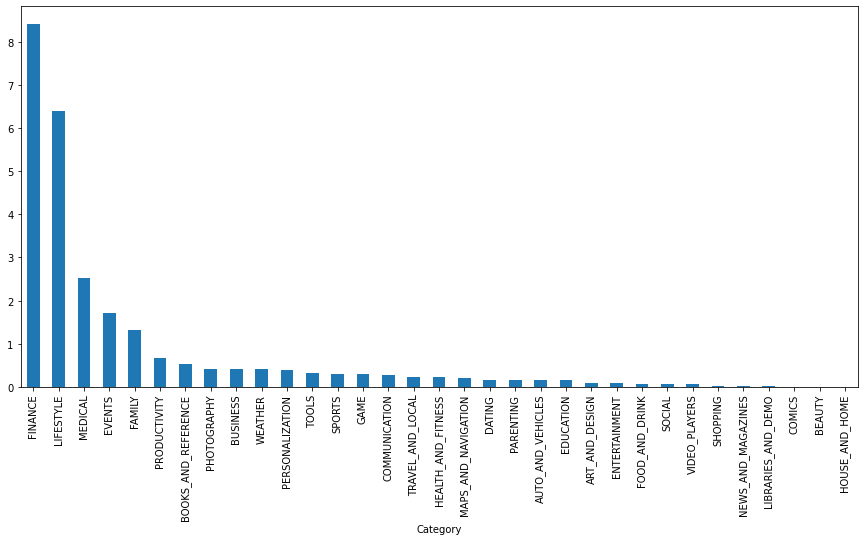

In [154]:
plt.rcParams['figure.figsize']=(15,7)
df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot(kind='bar');

Finance Apps are producing most revenue.None the App from Comics,Beauty,House_and_Home Category are paid.

Successness of an App can be measured based upon two factors.
*   Number of Installation of the App
*   Rating of the App

In [155]:
category_installs_rating=pd.merge(app_category_avg_install,app_category_rating,how='inner',on='Category').reset_index()
category_installs_rating


,Category,Installs,Rating
0,COMMUNICATION,3.504215e+07,4.131179
1,VIDEO_PLAYERS,2.409143e+07,4.056433
2,SOCIAL,2.296179e+07,4.236137
3,ENTERTAINMENT,2.072216e+07,4.135294
4,PHOTOGRAPHY,1.654501e+07,4.158428
5,PRODUCTIVITY,1.548955e+07,4.181408
6,GAME,1.447229e+07,4.243736
7,TRAVEL_AND_LOCAL,1.321866e+07,4.084675
8,TOOLS,9.675661e+06,4.057175
9,NEWS_AND_MAGAZINES,9.327629e+06,4.131741


In [156]:
category_installs_rating[(category_installs_rating['Installs']*category_installs_rating['Rating'])==((category_installs_rating['Installs']*category_installs_rating['Rating']).max())]

,Category,Installs,Rating
0,COMMUNICATION,3.504215e+07,4.131179


Communication App can be considered as best on users' perspective.As it is hugely installed by users and also have high ratings.And combinely the average installation and Rating are higher than all others.

In [157]:
install_rating=df['Installs']*df['Rating']  #Finding Apps with best average install ratio and rating
best_app=df[(df['Installs']*df['Rating'])==(install_rating.max())]
best_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1356,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2003,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2191,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


These Apps are the best Apps on user perspective.Maximum users installed these Apps and also liked most with 4.5 rating.

# Some observation on the Apps liked most by the users.

In [158]:
best_app['Category'].unique()

array(['GAME', 'SOCIAL', 'PHOTOGRAPHY'], dtype=object)

--->People mostly likes Gaming,Social and Photographic applications.

In [159]:
best_app['Type'].unique()

array(['Free'], dtype=object)

--->All the Apps that are liked most are Free.

In [160]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


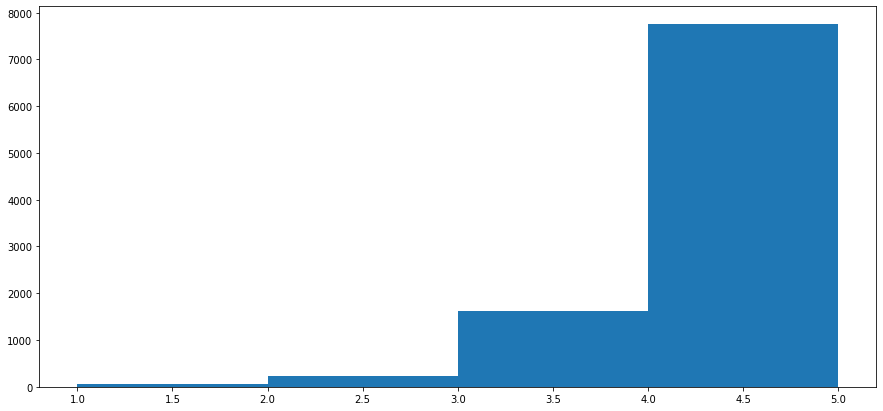

In [161]:
all_rating=df['Rating']
rating_interval=[1.0,2.0,3.0,4.0,5.0]
plt.hist(all_rating,rating_interval);

Maximum Apps are ratted with 4 to 5.Users responding with good rating to Play Store Apps.

In [162]:
#Finding App with high Price
df[df['Price']==df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


I'm Rich - Trump Edition is the highest price App in Play Store with price of $400.

Thinking on Business oriented,the best App is that which produced most revenue.

In [163]:
df[(df['Price']*df['Installs'])==((df['Price']*df['Installs']).max())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1743,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device


Minecraft App has produced maximum revenue i.e.:(10000000*6.99
)=$69900000

# Let's go for second Data set

In [164]:
df1=pd.read_csv(path+'User Reviews.csv')

In [165]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [166]:
df1_copy=df1.copy() #creating a copy to make our original data set safe and unmodified that may be used further

# Let's understand the Data Set

Lot of Users give their Reviews on Play Store Apps.This Data set has records of all the reviews given by users.Each row gives details about a single review.

**Let's explore the columns**

1.   App:   Name of the App on which the Review is about.
2.   Translated_Review:   What the review giver says about the App(a english language statement)
3.   Sentiment:   Either the Review statement reflects positive,negative or neutral based on its verbal meaning.

Sentimen polarity and subjectivity are the techniques used in sentiment analysis in NLP.Polarity refers to how much positive or negative or neutral the review statement reflects.Subjectivity refers to personal opinion, emotion or judgment in a review.
4.   Sentiment_Polarity:    Numerical representation of how much positive or negative or neutral the review statement reflects ranged from -1 to 1.-1 is towards negative sentiment,+1 is toward positive sentiment and 0 is for neutral.
5.   Sentiment_Subjectivity:     Numerical representation of someone's personal opinion, emotion or judgment in a review.


# Data Cleaning

In [167]:
df1.shape

(64295, 5)

In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [169]:
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [170]:
df1.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Let's Drop the NULL values.

In [171]:
df1.dropna(inplace=True)

In [172]:
df1.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now there is no NULL value in the Data Set.

# **Data Analysis and visualization**

In [173]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [174]:
df1['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

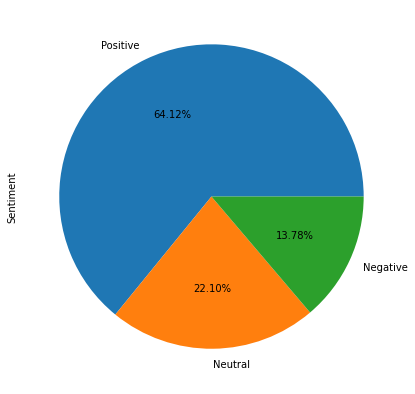

In [175]:
df1['Sentiment'].value_counts().plot(kind='pie',labels=df1['Sentiment'].unique(),autopct='%.2f%%');

64% reviews are positive,22% are negative and 14% are Negative.

# Finding the Average Sentiment of all Apps.

In [176]:
app_wise_review=df1.groupby('App').agg({'Sentiment':pd.Series.mode,'Sentiment_Polarity':'mean','Sentiment_Subjectivity':'mean'})
app_wise_review.reset_index(inplace=True)

In [177]:
app_wise_review

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Positive,0.392405,0.545516
2,11st,Positive,0.185943,0.455340
3,1800 Contacts - Lens Store,Positive,0.318145,0.591098
4,1LINE – One Line with One Touch,Positive,0.196290,0.557315
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,Positive,0.101622,0.545444
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Positive,0.251765,0.393284
862,Hotstar,"[Negative, Positive]",0.038178,0.493964
863,Hotwire Hotel & Car Rental App,Positive,0.187029,0.459717


In [178]:
app_wise_review[app_wise_review['Sentiment_Polarity']==app_wise_review['Sentiment_Polarity'].max()]

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
846,HomeWork,Positive,1.0,0.3


'HomeWork' App has highest Sentiment Polarity.i.e.:1(Fully Positive Review)

In [179]:
app_wise_review[app_wise_review['Sentiment_Polarity']==app_wise_review['Sentiment_Polarity'].min()]

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
495,Draw Your Game,Negative,-0.66849,0.683333


'Draw Your Game'	 App has lowest Sentiment Polarity.i.e.: -0.66849

In [180]:
app_wise_review[app_wise_review['Sentiment_Subjectivity']==app_wise_review['Sentiment_Subjectivity'].max()]

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
756,Google Slides,Positive,0.933333,0.916667


Google Slides App has the highest Sentiment Subjectivity.

In [181]:
app_wise_review[app_wise_review['Sentiment_Subjectivity']==app_wise_review['Sentiment_Subjectivity'].min()]

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
293,CBS News,Neutral,0.0,0.0
759,Google Trips - Travel Planner,Positive,0.3,0.0
775,HD Camera,Neutral,0.0,0.0


CBS News,Google Trips - Travel Planner,HD Camera-These Apps have zero sentiment subjectivity.

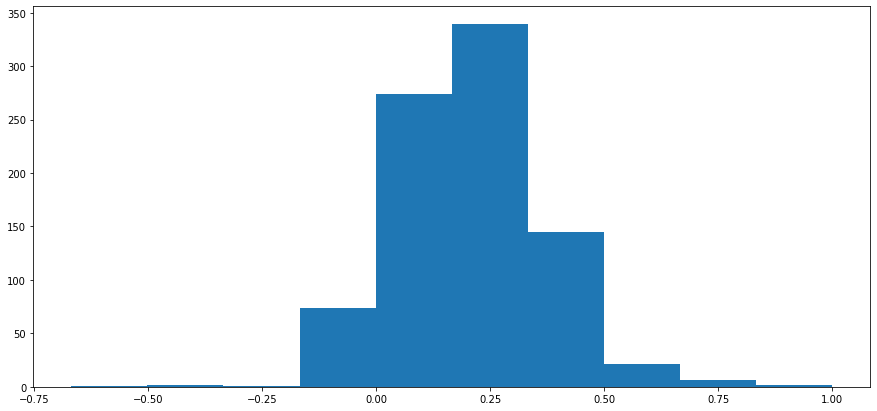

In [182]:
plt.hist(app_wise_review['Sentiment_Polarity']);

On the above graph,we can visualize numbers of Apps for each range of Sentiment Polarity.

In [183]:
#Let's join both the Data Frames to compare App details and sentiment,Reviews
merged_df=pd.merge(df,app_wise_review,how='inner',on='App')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Positive,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Positive,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,Positive,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,0.0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,Positive,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,Positive,0.171836,0.572762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369,Varies with device,1000000,Free,0.0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,Positive,0.161824,0.465806
812,AppLock,TOOLS,4.4,4931562,Varies with device,100000000,Free,0.0,Everyone,Tools,"June 11, 2018",Varies with device,Varies with device,Negative,0.016233,0.499941
813,Diary with lock password,LIFESTYLE,4.3,179139,9.7M,5000000,Free,0.0,Everyone,Lifestyle,"November 1, 2017",3.5.3,4.0.3 and up,Positive,0.292267,0.509656
814,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91M,10000000,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,Positive,0.080859,0.505326


Let's find the co-relation between the rating and sentiment.

In [184]:
y=merged_df[['Rating','Sentiment_Polarity','Sentiment_Subjectivity']]

In [185]:
corr_df=y.corr()

In [186]:
corr_df

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.264053,0.215488
Sentiment_Polarity,0.264053,1.000000,0.320380
Sentiment_Subjectivity,0.215488,0.320380,1.000000


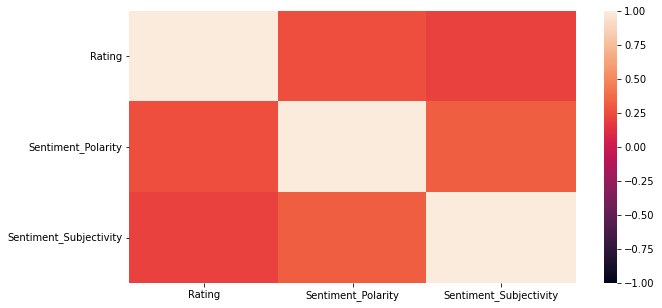

In [187]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(corr_df,vmin=-1,vmax=1);

Apps having better rating,also got good review statements(having good Sentiment Polarity and Subjectivity) from users.Which is obvious.

In [188]:
category_wise_sentiment=merged_df.groupby('Category',as_index=False).agg({'Sentiment':pd.Series.mode,'Sentiment_Polarity':'mean','Sentiment_Subjectivity':'mean'})

In [189]:
category_wise_sentiment

,Category,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,ART_AND_DESIGN,Positive,0.251088,0.548811
1,AUTO_AND_VEHICLES,Positive,0.270667,0.522984
2,BEAUTY,Positive,0.221777,0.490753
3,BOOKS_AND_REFERENCE,Positive,0.263243,0.464572
4,BUSINESS,Positive,0.223649,0.462670
5,COMICS,Positive,0.396460,0.506296
6,COMMUNICATION,Positive,0.189158,0.489954
7,DATING,Positive,0.177511,0.500674
8,EDUCATION,Positive,0.305042,0.486240
9,ENTERTAINMENT,Positive,0.152953,0.486063


In [190]:
category_wise_sentiment['Sentiment'].unique()

array(['Positive'], dtype=object)

All the App Categories have an average positive sentiment.

In [191]:
category_wise_sentiment[category_wise_sentiment['Sentiment_Polarity']==category_wise_sentiment['Sentiment_Polarity'].max()]

,Category,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
5,COMICS,Positive,0.39646,0.506296


COMICS	Apps are having highest sentiment polarity.

# Some important **conclusions** based on our Analysis

*   In Play Store,Gaming and communication Apps are installed mostly.
*   Play Store provides 92% Apps as Free.And users also prefers mostly the Free Apps.
*   In play Store,maximum apps are ratted from 4 to 5 by Users.
*   "I'm Rich - Trump Edition" is the highest price App in Play Store with price of $400.
*   Almost all Apps has got good review statements from Users having positive Sentiment.
*   VIDEO PLAYER,SOCIAL,ENTERTAINMENT-These category Apps are installed hugely by the users,But these category Apps are present in few amount in Play Store.So Developer needs to focus on it.





